In [85]:
#Question:-----------------------------------------------------------------------------------------------------
# Dataset link : https://www.kaggle.com/datasets/prathamtripathi/drug-classification Do visualization 
#         and analysis to understand 
#         the dataset (follow kaggle code for inspiration) Apply Random Forest Plot AUC-ROC curve * 

# Utsav Bhowmik

In [86]:
import pandas as pd
import seaborn as sns

#machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #split test and train data from model data

#for evaluating our ML result
from sklearn import metrics #takes out the evaluation metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [87]:
df=pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [89]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [90]:
#so no null value in any column
#we can see the total number of null all columns combined,which will basically give us zero
df.isnull().sum().sum()

0

In [91]:
dfcopy=df.copy()
def Encoder(df):
    columnsToEncode=list(dfcopy.select_dtypes(include=['category','object']))
    le=LabelEncoder()
    print(f'cols for label encoding :{columnsToEncode}')
    for feature in columnsToEncode:
        try:
            dfcopy[feature]=le.fit_transform(dfcopy[feature])
        except:
            print('Error encoding'+feature)
    return dfcopy
dfcopy=Encoder(dfcopy)
dfcopy

cols for label encoding :['Sex', 'BP', 'Cholesterol', 'Drug']


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [92]:
df['Age'].min()

15

In [93]:
df['Age'].max()

74

In [94]:
df['Na_to_K'].max()

38.247

In [95]:
df['Na_to_K'].min()

6.269

In [96]:
dfcopy['Drug'].unique(),df['Drug'].unique

(array([0, 3, 4, 1, 2]),
 <bound method Series.unique of 0      DrugY
 1      drugC
 2      drugC
 3      drugX
 4      DrugY
        ...  
 195    drugC
 196    drugC
 197    drugX
 198    drugX
 199    drugX
 Name: Drug, Length: 200, dtype: object>)

In [97]:
dfcopy['Drug'].unique(),df['Drug'].unique() 

(array([0, 3, 4, 1, 2]),
 array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object))

In [98]:
#So here DrugY labelencoded to 0,drugC to 3,,drugX to 4,,drugA to 1 and drugB to 2

In [99]:
dfcopy['BP'].unique(),df['BP'].unique() 


(array([0, 1, 2]), array(['HIGH', 'LOW', 'NORMAL'], dtype=object))

In [100]:
#Here,O stands for High,1 stands for 1 and 2 stands for Normal

In [101]:
dfcopy['Cholesterol'].unique(),df['Cholesterol'].unique() 

(array([0, 1]), array(['HIGH', 'NORMAL'], dtype=object))

In [102]:
dfcopy['Sex'].unique(),df['Sex'].unique() 

(array([0, 1]), array(['F', 'M'], dtype=object))

In [103]:
#we can see the values in the dfcopy array and then the df array and can determine which categorical value labelencoded
#to which numerical value

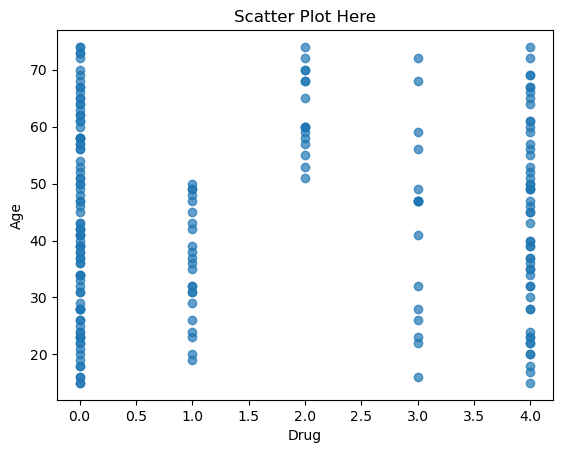

In [104]:
plt.scatter(dfcopy['Drug'],dfcopy['Age'],alpha=0.7)
plt.title("Scatter Plot Here")
plt.xlabel('Drug')
plt.ylabel('Age')
plt.show()

In [105]:
#we can see that drugY is most used,by almost all age groups,assumption of drugC is mostly by the 18 to 50 age group
#and we can see the characteristics of the usage of the drugs by ages for the other drugs too

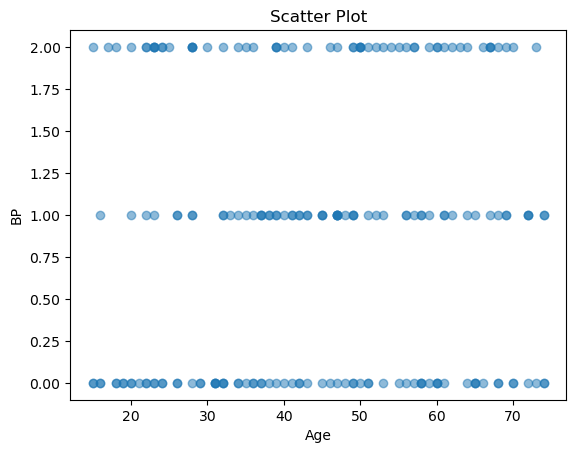

In [106]:
plt.scatter(dfcopy['Age'],dfcopy['BP'],alpha=0.50)# x axis e totalbill jaabe,,,y axis e tip jaabe
plt.title("Scatter Plot")
plt.xlabel('Age')
plt.ylabel('BP')
plt.show()

Text(0, 0.5, 'Na_to_K')

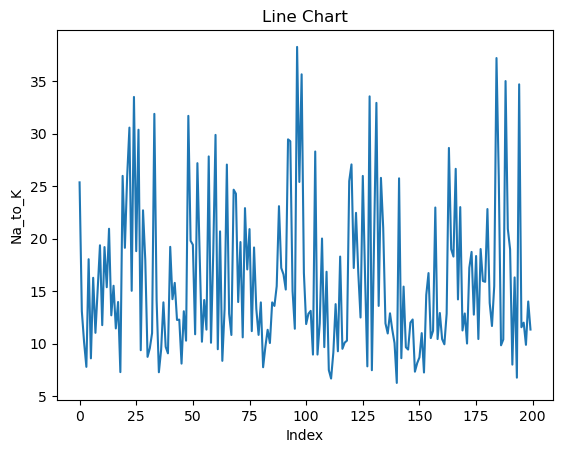

In [107]:
plt.plot(dfcopy['Na_to_K'])
plt.title("Line Chart")
plt.xlabel('Index')
plt.ylabel('Na_to_K')

Text(0, 0.5, 'Na_to_K')

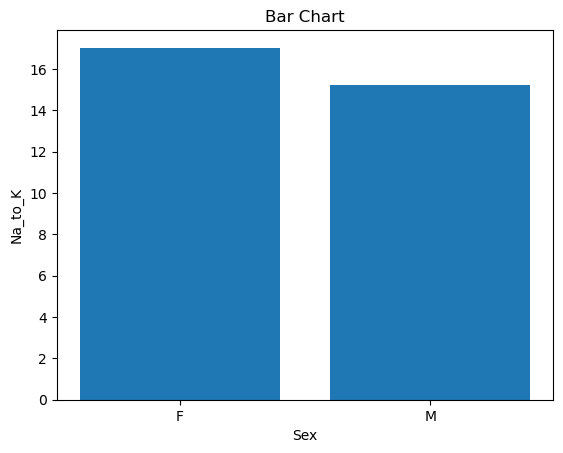

In [108]:
bar_df=df.groupby('Sex').mean().reset_index()
bar_df
plt.bar(bar_df['Sex'],bar_df['Na_to_K'])
plt.title('Bar Chart')
plt.xlabel('Sex')
plt.ylabel('Na_to_K')

In [109]:
#Here we can see that sodium potassium ratio is higher in female than men

Text(0, 0.5, 'Na_to_K')

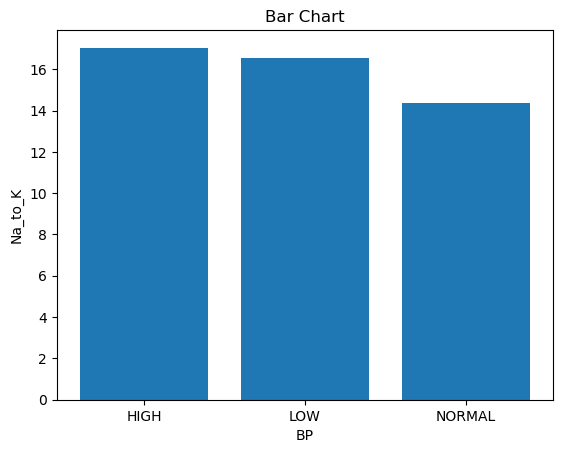

In [110]:
bar_df=df.groupby('BP').mean().reset_index()
bar_df
plt.bar(bar_df['BP'],bar_df['Na_to_K'])
plt.title('Bar Chart')
plt.xlabel('BP')
plt.ylabel('Na_to_K')

In [111]:
#we can see that sodium potassium ratio is high among the people with the high blood pressure.Here one thing to look
#particularly is people with normal BP has the lower Na:K than people with low BP

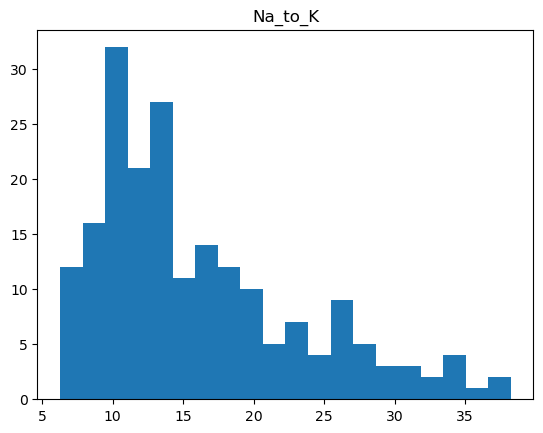

In [112]:
plt.hist(df['Na_to_K'],bins=20) #bin means how many interval e graph bhag khobe
plt.title('Na_to_K')
plt.show()

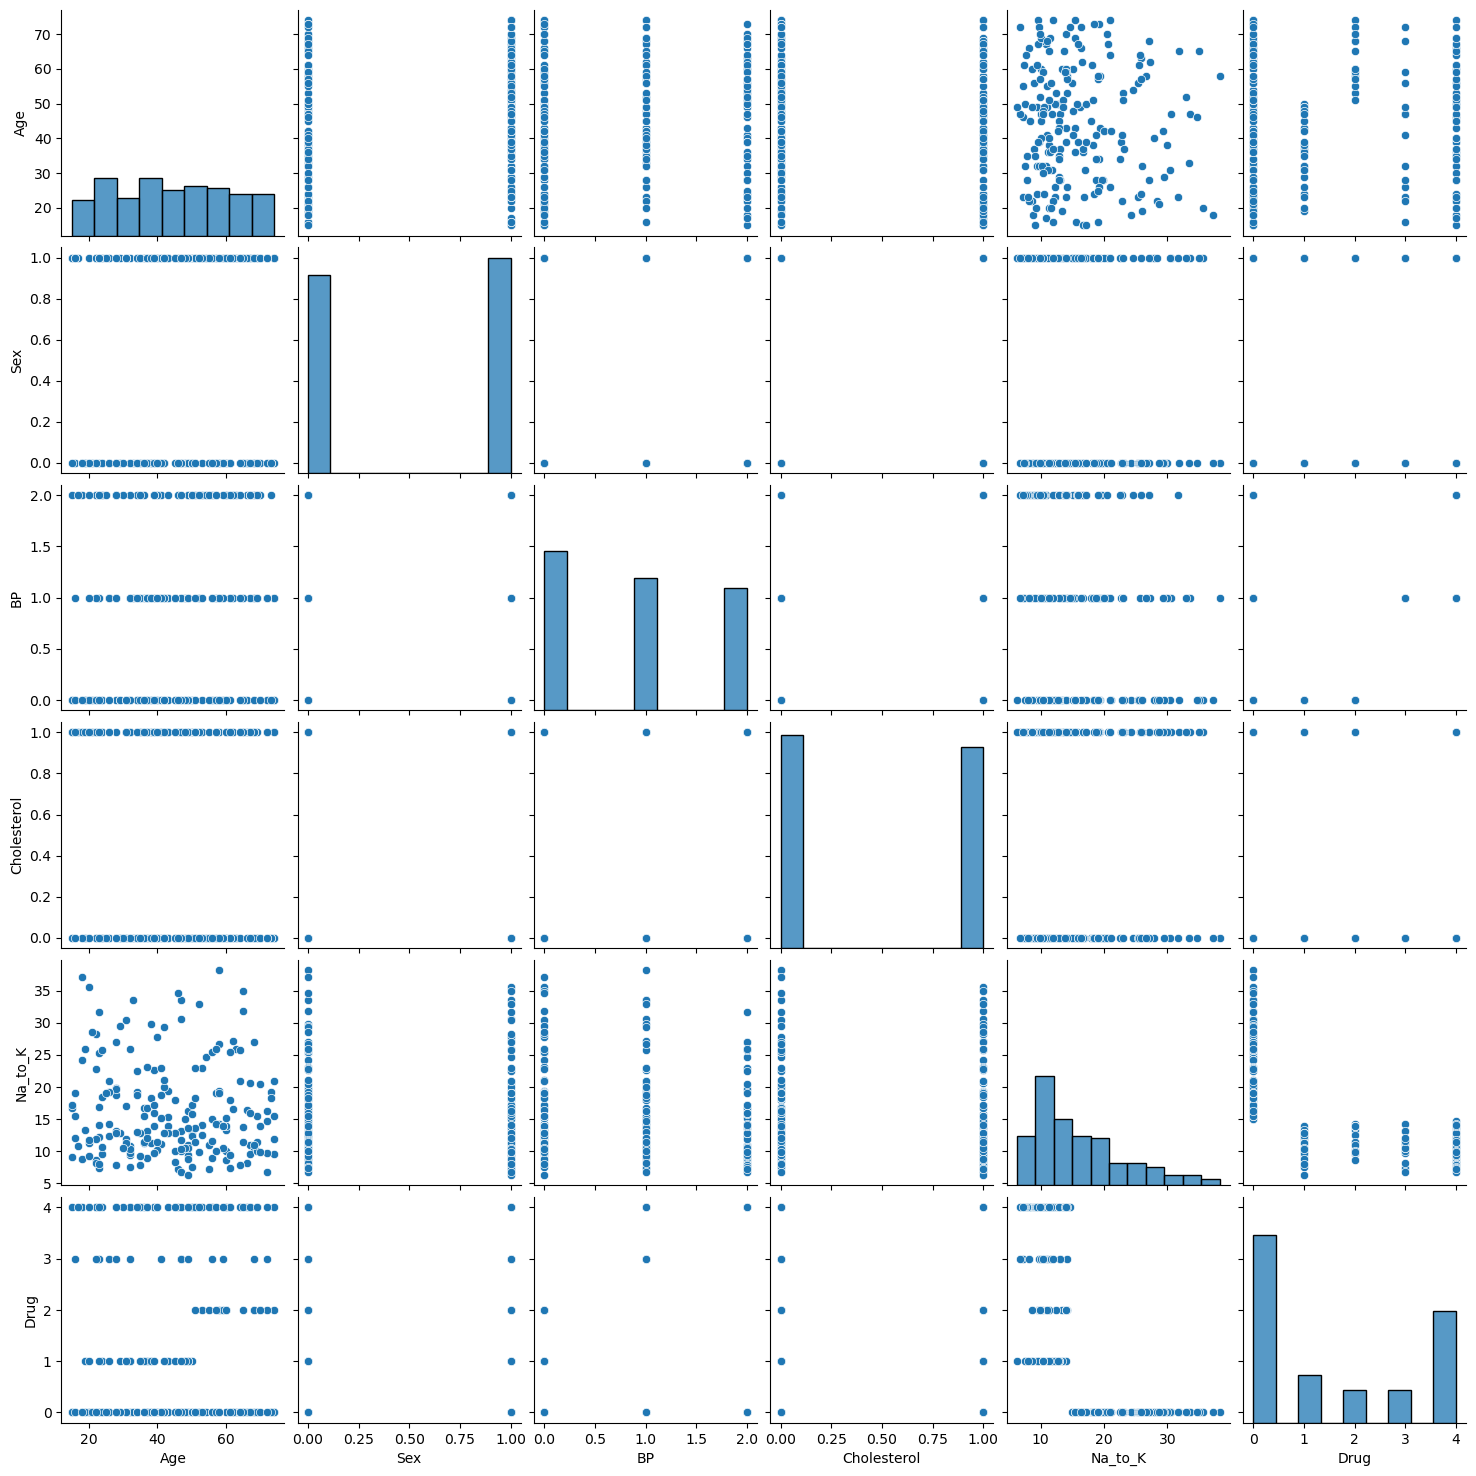

In [113]:
sns.pairplot(dfcopy)
plt.show()

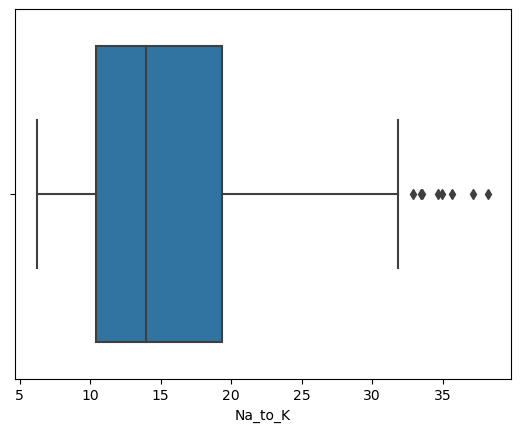

In [114]:
sns.boxplot(x=df['Na_to_K'])
plt.show()

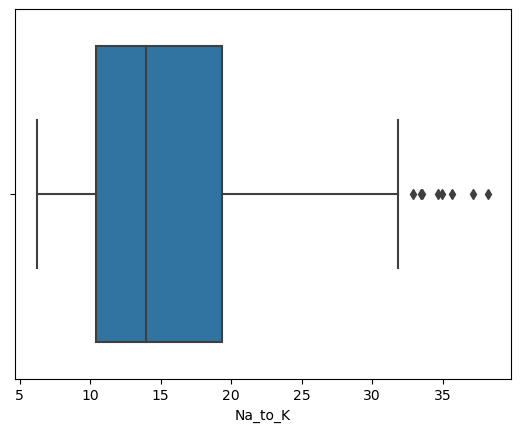

In [115]:
sns.boxplot(x=df['Na_to_K'])
plt.show()

In [171]:
"median :",df["Na_to_K"].median(),"max :",df["Na_to_K"].max(),"min :",df["Na_to_K"].min() #expalains the boxplot

('median :', 13.9365, 'max :', 38.247, 'min :', 6.269)

In [166]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [117]:
#so no null values

In [140]:
from sklearn.model_selection import train_test_split

X = dfcopy.drop("BP", axis=1)
y = dfcopy.BP

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#traing dataset

In [141]:
X_train.shape , X_test.shape

((140, 5), (60, 5))

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest
rf = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=5, random_state=45)
rf.fit(X_train, y_train)

# prediction
predict = rf.predict(X_test)

# result report
report = classification_report(y_test, predict)

print(report)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        23
           1       0.61      0.58      0.59        19
           2       0.67      0.56      0.61        18

    accuracy                           0.72        60
   macro avg       0.70      0.70      0.69        60
weighted avg       0.71      0.72      0.71        60



In [143]:
X_test.iloc[15]

Age            29.00
Sex             0.00
Cholesterol     0.00
Na_to_K        29.45
Drug            0.00
Name: 92, dtype: float64

In [144]:
X_test.iloc[15].values.reshape(1, -1).shape

(1, 5)

In [145]:
rf.predict([X_test.iloc[15]]) 

array([0])

In [146]:
y_test.iloc[15]

0

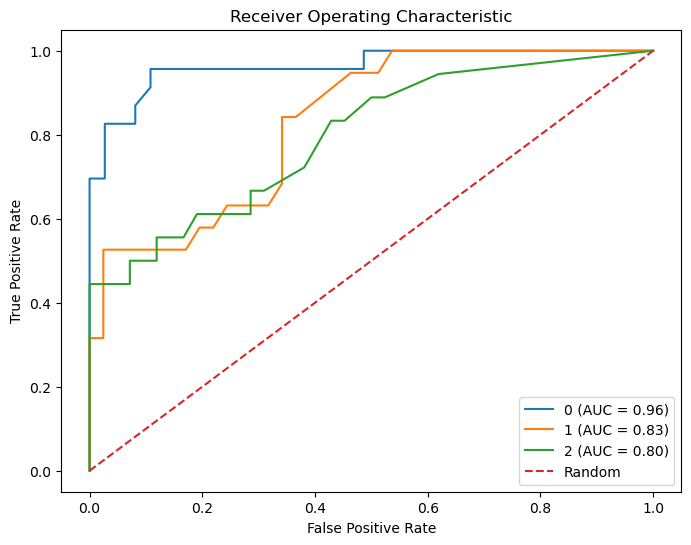

[2.   1.   0.86 0.82 0.62 0.54 0.52 0.44 0.32 0.28 0.2  0.18 0.16 0.14
 0.1  0.08 0.06 0.04 0.02 0.  ]
[0.         0.05555556 0.33333333 0.44444444 0.44444444 0.5
 0.5        0.55555556 0.55555556 0.61111111 0.61111111 0.66666667
 0.66666667 0.72222222 0.83333333 0.83333333 0.88888889 0.88888889
 0.94444444 1.        ]


In [150]:
rf.fit(X_train, y_train)
y_probs = rf.predict_proba(X_test)

# get class labels
class_labels = rf.classes_

# plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(class_labels):
    # get probabilities for this class
    pos_probs = y_probs[:, i]
    # compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pos_probs, pos_label=class_label)
    # calculate AUC
    roc_auc = auc(fpr, tpr)
    # plot ROC curve
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (class_label, roc_auc))

# plot random classifier
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
# set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
# add legend
plt.legend()
# show the plot
plt.show()
print(thresholds)
print(tpr)


In [ ]:
#It is basically one vs all approach..We can say that our model is very accurate as the straight lines are coming along
#the corner line.False positive case is lower and the true positive cases are higher.